# WHAT IS NORMAL DISTRIBUTION ?

A probability distribution with the mean 0 and standard deviation of 1 is known as standard normal distribution or Gaussian distribution. A normal distibution is **symmetric** about the mean and follows a **bell shaped curve** . And almost 99.7% of the values lies within 3 standard deviation. The mean, median and mode of a normal distribution are equal.

---



# SKEWNESS

## What is skewness?

Skewness of a distribution is defined as the lack of symmetry. In a symmetrical distribution, the Mean, Meadian and Mode are equal.The normal distribution has a skewness of 0.


Skewness tell us about distribution of our data.


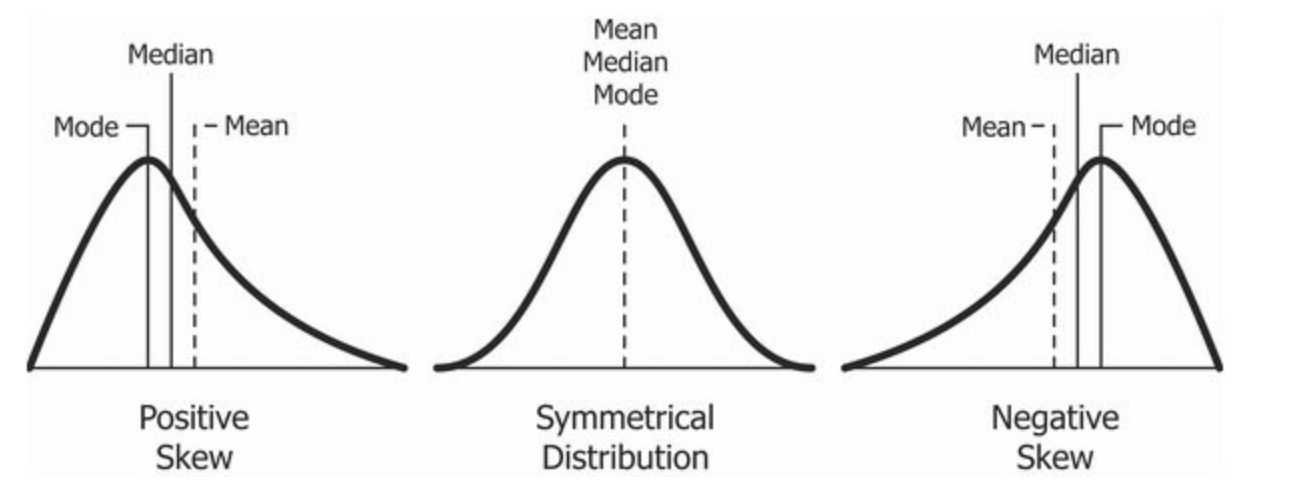

## Skewness is of two types:

* **Positive skewness:** When the tail on the right side of the distribution is longer or fatter, we say the data is positively skewed. For a positive skewness mean > median > mode.   

* **Negative skewness:** When the tail on the left side of the distribution is longer or fatter, we say that the distribution is negatively skewed. For a negative skewness mean < median < mode.
---

## What does skewness tells us?
To understand this better consider a example.

Consider house prices ranging from 100k to 1,000,000 with the average being 500,000. 

If the peak of the distribution is in left side that means our data is positively skewed and most of the houses are being sold at the price less than the average.  

If the peak of the distribution is in right side that means our data is negatively skewed and most of the houses are being sold at the price greater than the average.


Now, the question is when we can say our data is mderately skewed or heavily skewed?
  
  The thumb rule is:
  If the skewness is between -0.5 to +0.5 then we can say data is fairly symmetrical.
  If the skewness is between -1 to -0.5 or 0.5 to 1 then data is moderately skewed.
  And if the skewness is less than -1 and greater than +1 then our data is heavily skewed.


---



---



# Transformation to reduce skewness or kurtosis



Let's take an example to handle the skewness and kutosis in a dataset. For this, I have used the 'House Pricing' data.

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from scipy.stats import skew, skewtest, norm
import scipy.stats as st
from scipy.stats import kurtosis
from scipy.stats import boxcox

In [3]:
#read data
df1= pd.read_csv('House Price.csv')
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df = df1.copy()

### Let's check the distribution of the "SalePrice"

In [5]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Here we can see that Mean (180921) is greater than the median(163000) and the maximum is 3.5 times the 75%. (The distribution is positvely skewed).
* We can say that most of the house prices are below the average.

### Let's plot and check

/Users/rana/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


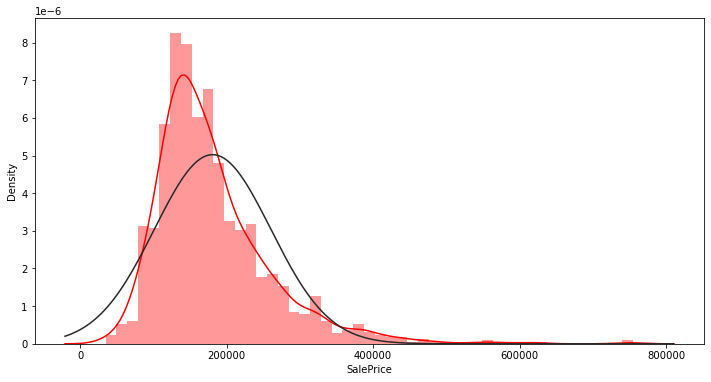

In [6]:
#Plot and check the distribution 
plt.figure(figsize=(12,6))
sns.distplot(df['SalePrice'],fit=norm, color ="r")
plt.show()

The histogram confirm that our dataset is positively skewed.

### Now let's check the measure of skewness and kurtosis

In [7]:
print("Skew of raw data: %f" % df['SalePrice'].skew()) #check skewness
print("Kurtosis of raw data: %f" % kurtosis(df['SalePrice'], fisher = False)) #check kurtosis

Skew of raw data: 1.882876
Kurtosis of raw data: 9.509812


Here, skew of raw data is positive and greater than 1,and kurtosis is greater than 3, right tail of the data is skewed. So, our data in this case is positively skewed and lyptokurtic.

Note- If we are keeping 'fisher=True', then kurtosis of normal distibution will be 0. Similarly, kurtosis >0 will be leptokurtic and kurtosis < 0 will be platykurtic

## Common transformation method to handle skewed data are
* square root transformation 
* Cube root transformation
* log transformations
* Box-cox transformation


### Let's look at the effect of all these transformation on our dataset.

## Log Transformation

Logarithm is defined only for positive values so we can't apply log transformation on 0 and negative numbers.

Logarithmic transformation is a convenient means of transforming a highly skewed variable into a more normalized dataset. When modeling variables with non-linear relationships, the chances of producing errors may also be skewed negatively.Using the logarithm of one or more variables improves the fit of the model by transforming the distribution of the features to a more normally-shaped bell curve.

Skew after Log Transformation: 0.121335


/Users/rana/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: Log_SalePrice, dtype: float64

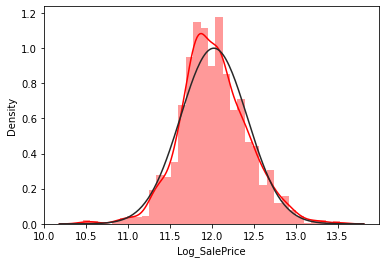

In [8]:
#log transformation
df['Log_SalePrice'] = np.log(df['SalePrice']) 

#check distribution,skewness and kurtosis
sns.distplot(df['Log_SalePrice'], fit=norm,color ="r")
print("Skew after Log Transformation: %f" % df['Log_SalePrice'].skew())
df['Log_SalePrice'].describe()

Now if you look the distribution it is close to normal distribution. We have also reduced the skewness and the kurtosis.

# Square Root Transformation

**Square root transformation** is one of the many types of standard transformations. This transformation is used for count data (data that follow a Poisson distribution) or small whole numbers. This transformation also may be appropriate for percentage data where the range is between 0 and 20% or between 80 and 100%.

In [9]:
df2 = df1.copy()

Skew after sqrt Transformation: 0.943153


/Users/rana/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: Log_SalePrice, dtype: float64

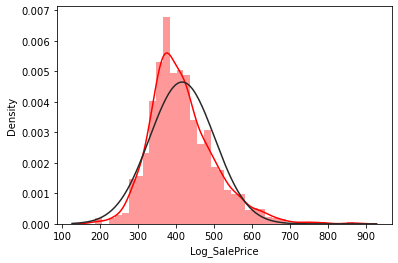

In [10]:
#log transformation
df2['Log_SalePrice'] = np.sqrt(df2['SalePrice']) 

#check distribution,skewness and kurtosis
sns.distplot(df2['Log_SalePrice'], fit=norm,color ="r")
print("Skew after sqrt Transformation: %f" % df2['Log_SalePrice'].skew())
df['Log_SalePrice'].describe()